Part 2: BASIS FUNCTION (CHEN ZIGENG A0260093L)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import linalg

def generate_sin():
    x = np.arange(0,1,0.05)
    y = np.sin((np.power(x,2)+1))
    return x,y

def generate_poly():
    x = np.arange(0,9,0.5)
    y = 0.4345*np.power(x,3)-5.607*np.power(x,2)+16.78*x-10.61
    return x,y

def addnoise(y_curve, mu, sigma):
    noise = np.random.normal(mu,sigma,len(y_curve))
    y_noise = y_curve + noise
    return y_noise

def nummpy_poly_fit(x,y,M):
    z = np.polyfit(x,y,M)
    f = np.poly1d(z)
    return f

def MLE_fitting_gaussian(x,y,M,s):
    N = len(x)
    mx = np.zeros([N,M+1])
    y = y.T

    for n in range(0,N):
        for m in range(0,M+1):
            if m == 0:
                mx[n][m] = 1
            else:
                mx[n][m] = Gaussian_basis(x[n],m/(M+1),s)

    mxx = np.dot(mx.T, mx)
    imxx = linalg.pinv(mxx)
    tmp = np.dot(imxx,mx.T)
    #tmp = linalg.pinv(mx)
    w = np.dot(tmp, y)
    return w

def MLE_fitting_sigmoid(x,y,M,s):
    N = len(x)
    mx = np.zeros([N,M+1])
    y = y.T

    for n in range(0,N):
        for m in range(0,M+1):
            if m == 0:
                mx[n][m] = 1
            else:
                mx[n][m] = Sigmoid_basis(x[n],m/(M+1),s)

    mxx = np.dot(mx.T, mx)
    imxx = linalg.pinv(mxx)
    tmp = np.dot(imxx,mx.T)
    #tmp = linalg.pinv(mx)
    w = np.dot(tmp, y)
    return w

def MLE_paint_gaussian(x,w,s):
    n = len(x)
    mx = np.zeros([n, len(w)])
    for i in range(n):
        for j in range(0, len(w)):
            if j == 0:
                mx[i][j] = 1
            else:
                mx[i][j] = Gaussian_basis(x[i],j/len(w),s)
    y_new = np.dot(mx, w)
    return y_new

def MLE_paint_sigmoid(x,w,s):
    n = len(x)
    mx = np.zeros([n, len(w)])
    for i in range(n):
        for j in range(0, len(w)):
            if j == 0:
                mx[i][j] = 1
            else:
                mx[i][j] = Sigmoid_basis(x[i],j/len(w),s)
    y_new = np.dot(mx, w)
    return y_new

def Gaussian_basis(x,mu,s):
    res = np.exp(-(x-mu)**2/(2*(s**2)))
    return res
    #return np.exp(-1 * linalg.norm(mu - x)**2 / (2 * s ** 2))

def Sigmoid_basis(x,mu,s):
    res = 1/(1+np.exp((mu-x)/s))
    return res



1.Generate 50 2D-data points using the following function

In [2]:
#generate True data
x_true,y_true = generate_sin()

#fit on the actual data
f = nummpy_poly_fit(x_true, y_true, 3)
x_curve = np.linspace(x_true[0],x_true[-1],50)
y_curve = f(x_curve)



2.Add Gaussian random noise to the data

In [3]:
#add noise on the True data
y_noise = addnoise(y_curve,0,0.04)
x_noise = x_curve



3.Fit the generated noisy data using the MLE that employs the Gaussian basis functions as discussed in class.

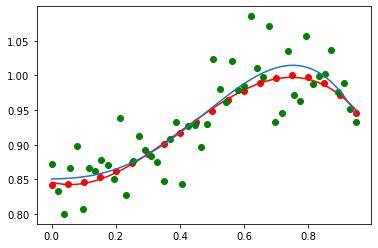

In [4]:
s = 1
w = MLE_fitting_gaussian(x_noise,y_noise,50,s)
y_predict1 = MLE_paint_gaussian(x_noise,w,s)

plt.figure()
plt.plot(x_true,y_true,'ro')
plt.plot(x_curve,y_curve,"red")
plt.plot(x_noise,y_noise,"go")
plt.plot(x_curve,y_predict1)
plt.show()



4.Show your results for different values of M that generate overfitting and underfitting curves.

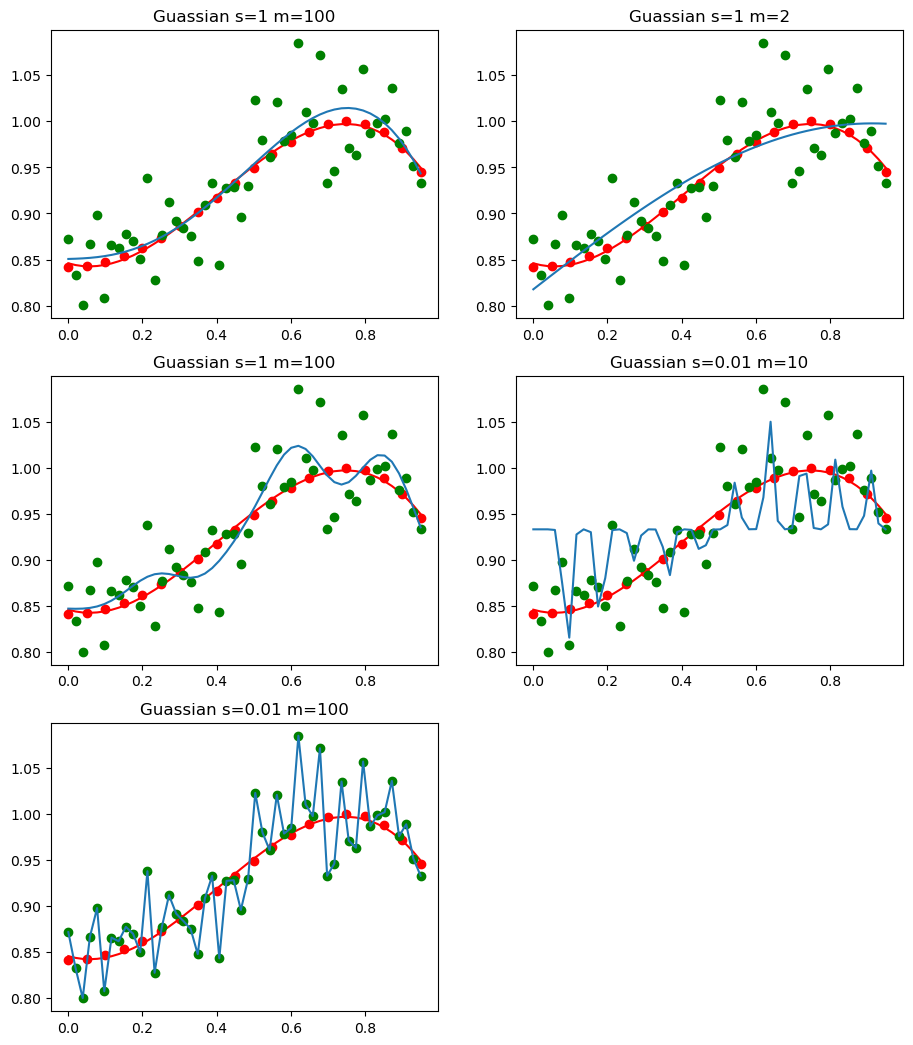

In [5]:
plt.figure(num=1, dpi=100, figsize=(11,13))

s = 1
w = MLE_fitting_gaussian(x_noise,y_noise,100,s)
y_predict1 = MLE_paint_gaussian(x_noise,w,s)

plt.subplot(3,2,1)
plt.plot(x_true,y_true,'ro')
plt.plot(x_curve,y_curve,"red")
plt.plot(x_noise,y_noise,"go")
plt.plot(x_curve,y_predict1)
plt.title("Guassian s=1 m=100")


s = 1
w = MLE_fitting_gaussian(x_noise,y_noise,2,s)
y_predict1 = MLE_paint_gaussian(x_noise,w,s)

plt.subplot(3,2,2)
plt.plot(x_true,y_true,'ro')
plt.plot(x_curve,y_curve,"red")
plt.plot(x_noise,y_noise,"go")
plt.plot(x_curve,y_predict1)
plt.title("Guassian s=1 m=2")


s = 0.1
w = MLE_fitting_gaussian(x_noise,y_noise,10,s)
y_predict1 = MLE_paint_gaussian(x_noise,w,s)

plt.subplot(3,2,3)
plt.plot(x_true,y_true,'ro')
plt.plot(x_curve,y_curve,"red")
plt.plot(x_noise,y_noise,"go")
plt.plot(x_curve,y_predict1)
plt.title("Guassian s=1 m=100")


s = 0.01
w = MLE_fitting_gaussian(x_noise,y_noise,10,s)
y_predict1 = MLE_paint_gaussian(x_noise,w,s)

plt.subplot(3,2,4)
plt.plot(x_true,y_true,'ro')
plt.plot(x_curve,y_curve,"red")
plt.plot(x_noise,y_noise,"go")
plt.plot(x_curve,y_predict1)
plt.title("Guassian s=0.01 m=10")


s = 0.01
w = MLE_fitting_gaussian(x_noise,y_noise,100,s)
y_predict1 = MLE_paint_gaussian(x_noise,w,s)

plt.subplot(3,2,5)
plt.plot(x_true,y_true,'ro')
plt.plot(x_curve,y_curve,"red")
plt.plot(x_noise,y_noise,"go")
plt.plot(x_curve,y_predict1)
plt.title("Guassian s=0.01 m=100")
plt.show()



5.Change the basis functions to the sigmoid basis functions, and show the results for different values of M that generate overfitting and underfitting curves.

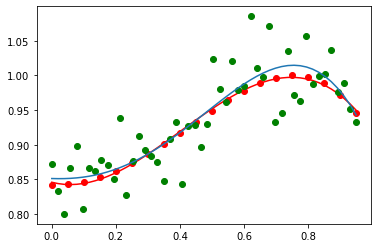

In [6]:
s = 1
w = MLE_fitting_sigmoid(x_noise,y_noise,50,s)
y_predict2 = MLE_paint_sigmoid(x_noise,w,s)

plt.figure()
plt.plot(x_true,y_true,'ro')
plt.plot(x_curve,y_curve,"red")
plt.plot(x_noise,y_noise,"go")
plt.plot(x_curve,y_predict2)
plt.show()

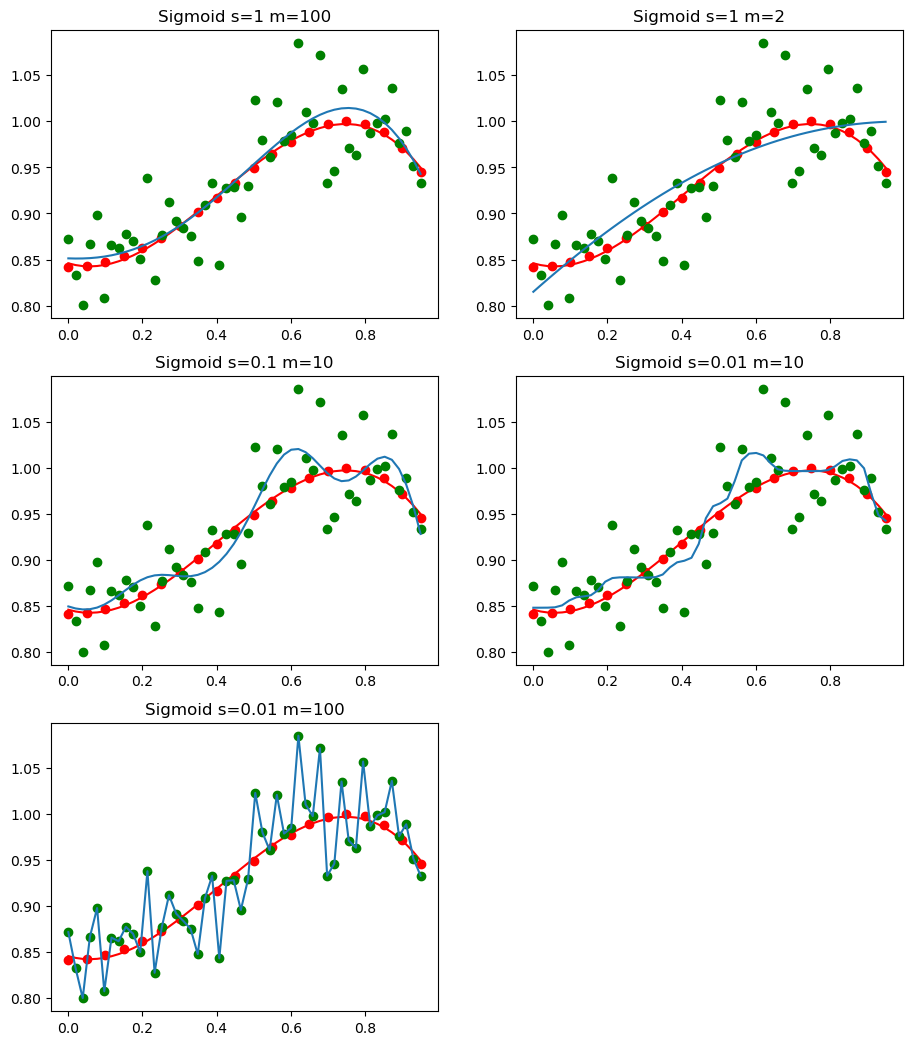

In [7]:
plt.figure(num=1, dpi=100, figsize=(11,13))

s = 1
w = MLE_fitting_sigmoid(x_noise,y_noise,100,s)
y_predict2 = MLE_paint_sigmoid(x_noise,w,s)

plt.subplot(3,2,1)
plt.plot(x_true,y_true,'ro')
plt.plot(x_curve,y_curve,"red")
plt.plot(x_noise,y_noise,"go")
plt.plot(x_curve,y_predict2)
plt.title("Sigmoid s=1 m=100")

s = 1
w = MLE_fitting_sigmoid(x_noise,y_noise,2,s)
y_predict2 = MLE_paint_sigmoid(x_noise,w,s)

plt.subplot(3,2,2)
plt.plot(x_true,y_true,'ro')
plt.plot(x_curve,y_curve,"red")
plt.plot(x_noise,y_noise,"go")
plt.plot(x_curve,y_predict2)
plt.title("Sigmoid s=1 m=2")

s = 0.1
w = MLE_fitting_sigmoid(x_noise,y_noise,10,s)
y_predict2 = MLE_paint_sigmoid(x_noise,w,s)

plt.subplot(3,2,3)
plt.plot(x_true,y_true,'ro')
plt.plot(x_curve,y_curve,"red")
plt.plot(x_noise,y_noise,"go")
plt.plot(x_curve,y_predict2)
plt.title("Sigmoid s=0.1 m=10")

s = 0.01
w = MLE_fitting_sigmoid(x_noise,y_noise,10,s)
y_predict2 = MLE_paint_sigmoid(x_noise,w,s)

plt.subplot(3,2,4)
plt.plot(x_true,y_true,'ro')
plt.plot(x_curve,y_curve,"red")
plt.plot(x_noise,y_noise,"go")
plt.plot(x_curve,y_predict2)
plt.title("Sigmoid s=0.01 m=10")

s = 0.01
w = MLE_fitting_sigmoid(x_noise,y_noise,100,s)
y_predict2 = MLE_paint_sigmoid(x_noise,w,s)

plt.subplot(3,2,5)
plt.plot(x_true,y_true,'ro')
plt.plot(x_curve,y_curve,"red")
plt.plot(x_noise,y_noise,"go")
plt.plot(x_curve,y_predict2)
plt.title("Sigmoid s=0.01 m=100")

plt.show()

6.Change the original curve function to , and use the sigmoid basis function to estimate the best curve fitting from the noisy data.

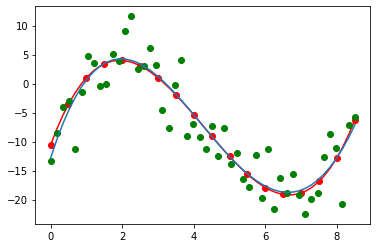

In [8]:
#generate True data
x_true,y_true = generate_poly()

#fit on the actual data
f = nummpy_poly_fit(x_true, y_true, 3)
x_curve = np.linspace(x_true[0],x_true[-1],50)
y_curve = f(x_curve)

#add noise on the True data
y_noise = addnoise(y_curve,0,4)
x_noise = x_curve

s = 10
w = MLE_fitting_sigmoid(x_noise,y_noise,50,s)
y_predict2 = MLE_paint_sigmoid(x_noise,w,s)

plt.figure()
plt.plot(x_true,y_true,'ro')
plt.plot(x_curve,y_curve,"red")
plt.plot(x_noise,y_noise,"go")
plt.plot(x_curve,y_predict2)
plt.show()

7.Experiment with different parameters of the Gaussian and sigmoid basis functions, and then show the plot. Also, discuss the advantages of these basis functions over polynomial functions.

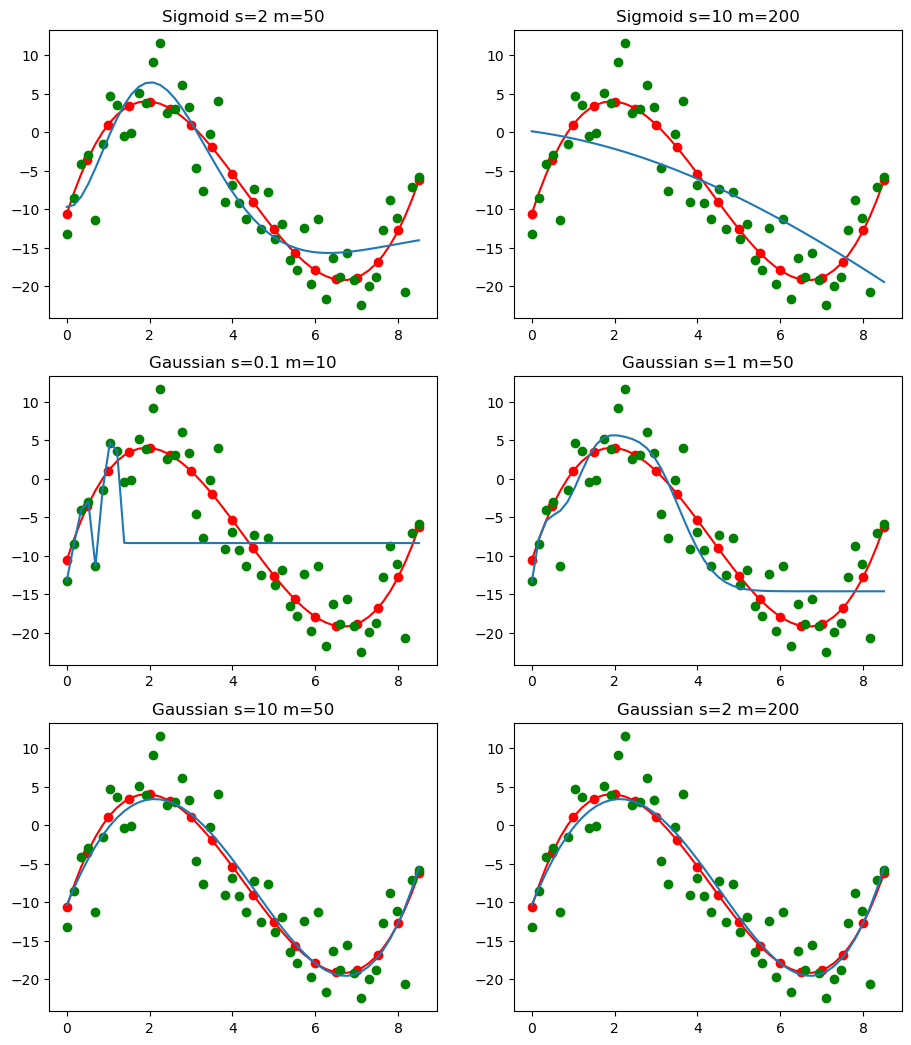

In [9]:
plt.figure(num=1, dpi=100, figsize=(11,13))

s = 2
w = MLE_fitting_sigmoid(x_noise,y_noise,50,s)
y_predict2 = MLE_paint_sigmoid(x_noise,w,s)
plt.subplot(3,2,1)
plt.plot(x_true,y_true,'ro')
plt.plot(x_curve,y_curve,"red")
plt.plot(x_noise,y_noise,"go")
plt.plot(x_curve,y_predict2)
plt.title("Sigmoid s=2 m=50")


s = 10
w = MLE_fitting_sigmoid(x_noise,y_noise,200,s)
y_predict2 = MLE_paint_sigmoid(x_noise,w,s)
plt.subplot(3,2,2)
plt.plot(x_true,y_true,'ro')
plt.plot(x_curve,y_curve,"red")
plt.plot(x_noise,y_noise,"go")
plt.plot(x_curve,y_predict2)
plt.title("Sigmoid s=10 m=200")


s = 0.1
w = MLE_fitting_gaussian(x_noise,y_noise,10,s)
y_predict2 = MLE_paint_gaussian(x_noise,w,s)
plt.subplot(3,2,3)
plt.plot(x_true,y_true,'ro')
plt.plot(x_curve,y_curve,"red")
plt.plot(x_noise,y_noise,"go")
plt.plot(x_curve,y_predict2)
plt.title("Gaussian s=0.1 m=10")


s = 1
w = MLE_fitting_gaussian(x_noise,y_noise,50,s)
y_predict2 = MLE_paint_gaussian(x_noise,w,s)
plt.subplot(3,2,4)
plt.plot(x_true,y_true,'ro')
plt.plot(x_curve,y_curve,"red")
plt.plot(x_noise,y_noise,"go")
plt.plot(x_curve,y_predict2)
plt.title("Gaussian s=1 m=50")

s = 10
w = MLE_fitting_gaussian(x_noise,y_noise,50,s)
y_predict2 = MLE_paint_gaussian(x_noise,w,s)
plt.subplot(3,2,5)
plt.plot(x_true,y_true,'ro')
plt.plot(x_curve,y_curve,"red")
plt.plot(x_noise,y_noise,"go")
plt.plot(x_curve,y_predict2)
plt.title("Gaussian s=10 m=50")


s = 10
w = MLE_fitting_gaussian(x_noise,y_noise,50,s)
y_predict2 = MLE_paint_gaussian(x_noise,w,s)
plt.subplot(3,2,6)
plt.plot(x_true,y_true,'ro')
plt.plot(x_curve,y_curve,"red")
plt.plot(x_noise,y_noise,"go")
plt.plot(x_curve,y_predict2)
plt.title("Gaussian s=2 m=200")
plt.show()

Advantages: 

1.It can avoid the unstable numerical problems.

2.It is easy to process a high dimensionality of xi.

3.We can express xn using the basis functions, in such a way, dimentionality changes.